In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Assign project folder path to a variable

path = r'C:\Users\cook family\Desktop\07-2023 Instacart Basket Analysis'

In [3]:
# Import data

df_final_subset = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_subset_sample.pkl'))

In [4]:
# Check output

df_final_subset.head()

,Gender,State,Age,n_dependants,fam_status,income,order_number,loyalty_flag,spending_flag,order_frequency_flag,...,busiest_period_of_day,region,department,Age_group,income_group,dependents_group,customer_profile,customer_income_profile,time_period,day
4,Female,Alabama,31,3,married,40423,5,New customer,Low spender,Non-frequent customer,...,Most orders,South,beverages,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Between 8am and 5pm,Wednesday
5,Female,Alabama,31,3,married,40423,6,New customer,Low spender,Non-frequent customer,...,Average orders,South,beverages,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Before 8am,Monday
11,Female,Alabama,31,3,married,40423,1,New customer,Low spender,Non-frequent customer,...,Average orders,South,snacks,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Between 8am and 5pm,Monday
12,Female,Alabama,31,3,married,40423,2,New customer,Low spender,Non-frequent customer,...,Average orders,South,snacks,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Before 8am,Tuesday
17,Female,Alabama,31,3,married,40423,7,New customer,Low spender,Non-frequent customer,...,Most orders,South,snacks,Middle Aged Adults,Low Income,Parent,Married older parent,Low income married older parent,Between 8am and 5pm,Sunday


In [5]:
# Check shape

df_final_subset.shape

(9722678, 27)

## Visualizations for stakeholders

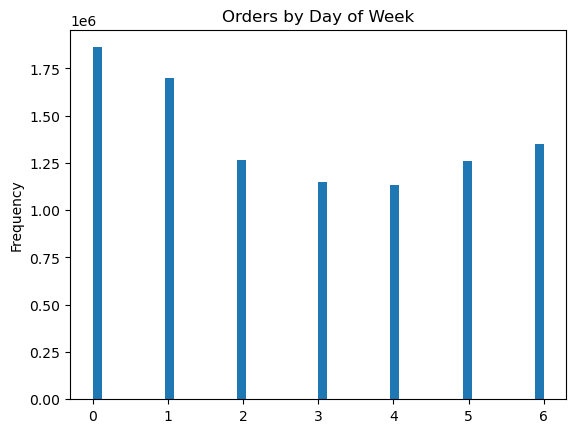

In [6]:
#Create a histogram of the “order_day_of_week” column

hist_day_of_week = df_final_subset['orders_day_of_week'].plot.hist(bins = 50, title = 'Orders by Day of Week')

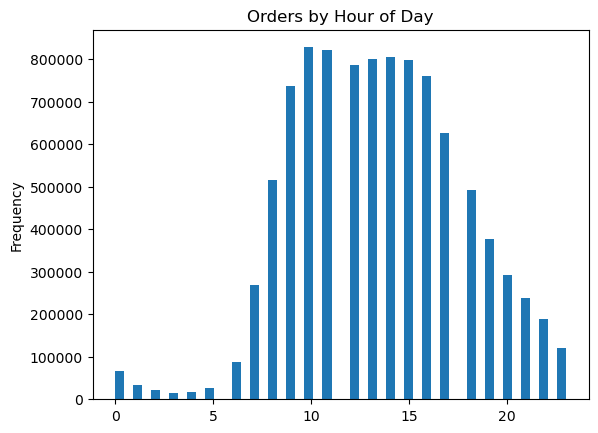

In [7]:
#Create a histogram of the “order_hour_of_day” column

hist_hour_of_day = df_final_subset['order_hour_of_day'].plot.hist(bins = 50, title = 'Orders by Hour of Day')

The busiest days of the week are Saturday/Sunday.
The least busy days of the week are Tuesday/Wednesday, followed by Monday/Thursday and then Friday.

Most orders are placed between 9a - 4p, which is during normal working hours.
Orders start to ramp up at about 7a, and start to trail off during the evening hours and into late night.  
The least amount of orders are placed before 7a and after 8p.

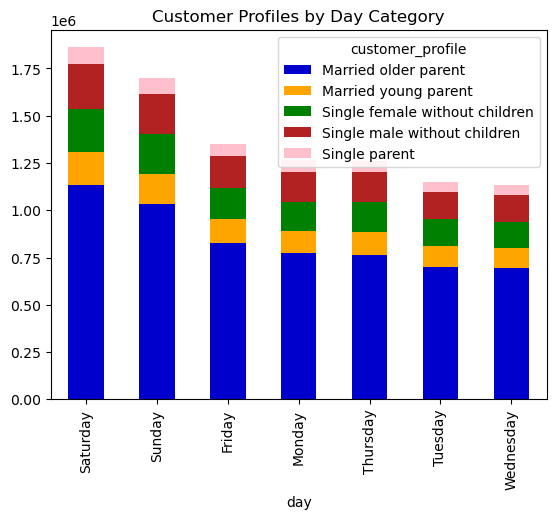

In [8]:
# Group customer profile and day

cust_prof_day = df_final_subset.groupby(['day', 'customer_profile']).size().unstack()

# Sort

cust_prof_day = cust_prof_day.loc[cust_prof_day.sum(axis=1).sort_values(ascending=False).index]

# Create bar chart

bar_cust_prof_day = cust_prof_day.plot.bar(stacked = True, color = ['mediumblue', 'orange', 'green', 'firebrick', 'pink'], title = 'Customer Profiles by Day Category')

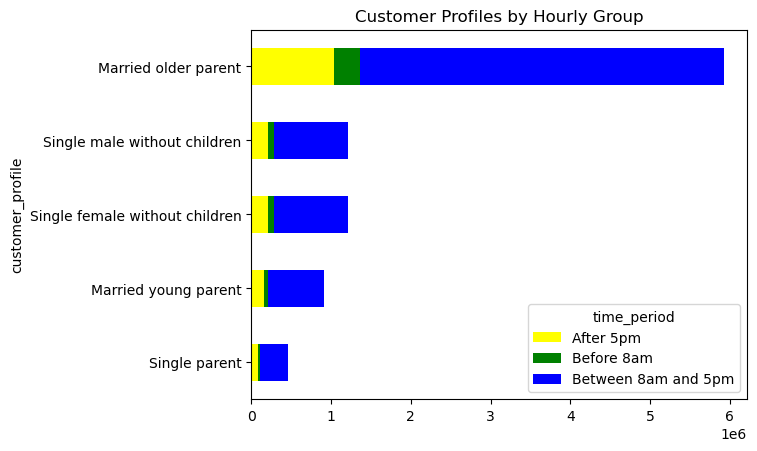

In [9]:
# Group customer profile and time period

cust_prof_time_period = df_final_subset.groupby(['customer_profile', 'time_period']).size().unstack()

# Sort

cust_prof_time_period = cust_prof_time_period.loc[cust_prof_time_period.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_time_period = cust_prof_time_period.plot.barh(stacked = True, title = 'Customer Profiles by Hourly Group', color = ['yellow', 'green', 'blue'])

### 2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

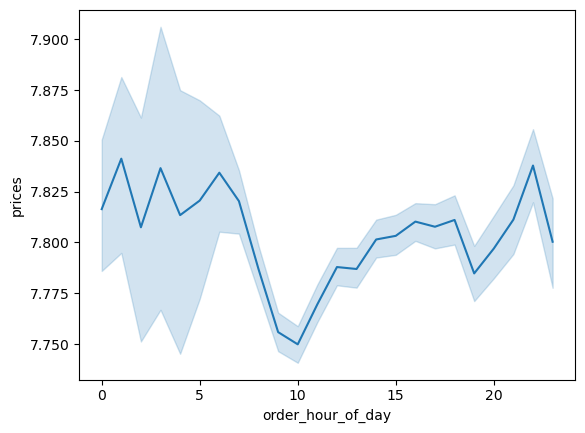

In [68]:
# Create line chart of prices

line_prices_hour = sns.lineplot(data = df_final_subset, x = 'order_hour_of_day',y = 'prices')

### 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

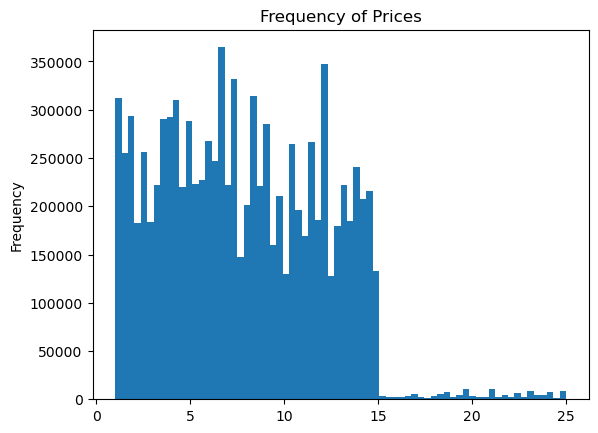

In [11]:
# Create a histogram of the "prices" column

hist_prices = df_final_subset['prices'].plot.hist(bins = 70, title = 'Frequency of Prices')

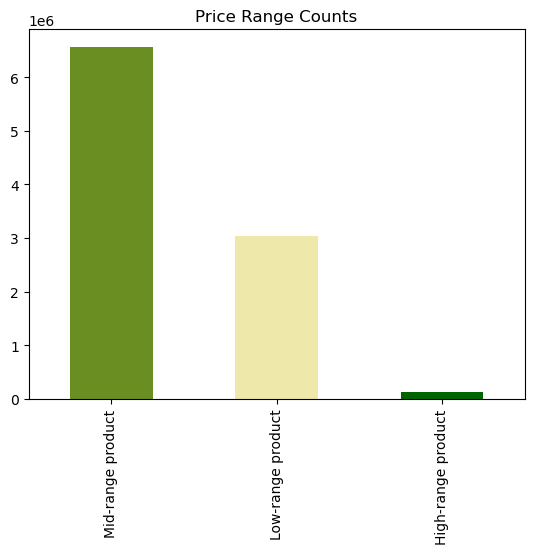

In [12]:
# Create a bar chart from the "customer_profile" column

bar_price_range = df_final_subset['price_range'].value_counts().plot.bar(title = 'Price Range Counts', color = ['olivedrab', 'palegoldenrod', 'darkgreen'] )

There's a huge reduction in order frequency for products that are priced >$15, with the higher priced products barely making it onto the graph.

Products, priced between 6 - 15 dollars and low-range products, priced less than 6 dollars, shows the greater popularity of the mid-range products 

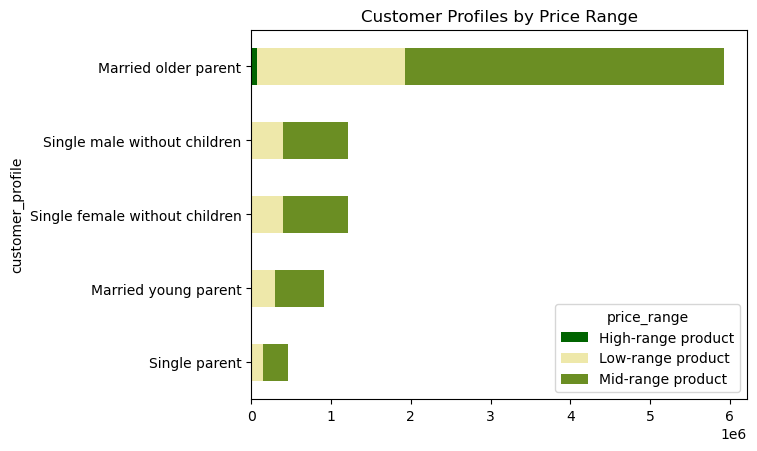

In [13]:
# Group customer profile and price range

cust_prof_price_range = df_final_subset.groupby(['customer_profile', 'price_range']).size().unstack()

# Sort

cust_prof_price_range = cust_prof_price_range.loc[cust_prof_price_range.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_price_range = cust_prof_price_range.plot.barh(stacked = True, title = 'Customer Profiles by Price Range', color = ['darkgreen', 'palegoldenrod', 'olivedrab'])

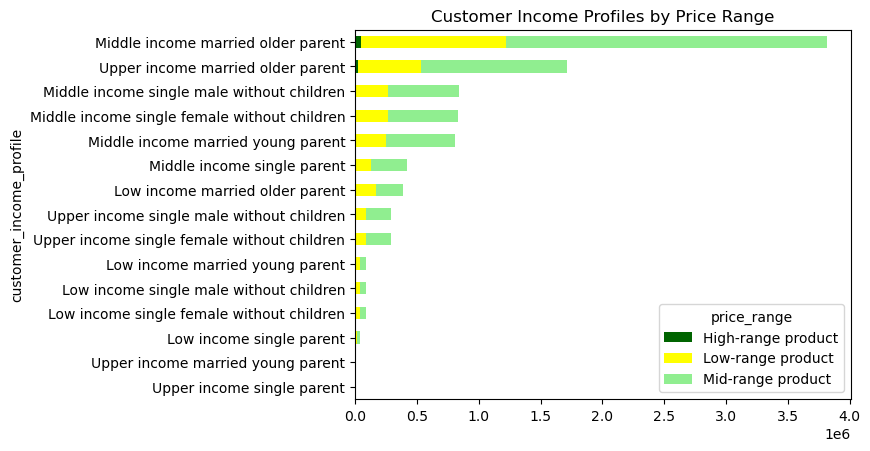

In [14]:
# Group customer profile and departments

cust_inc_prof_price_range = df_final_subset.groupby(['customer_income_profile', 'price_range']).size().unstack()

# Sort

cust_inc_prof_price_range = cust_inc_prof_price_range.loc[cust_inc_prof_price_range.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_inc_prof_price_range = cust_inc_prof_price_range.plot.barh(stacked = True, title = 'Customer Income Profiles by Price Range', color = ['darkgreen', 'yellow', 'lightgreen'])

The higher frequency of mid-range product orders is consistent across the customer profile groups.

The higher frequency of mid-range product orders is also consistent across the customer income profile groups, regardless of customer spending power, with the closest customer income profile to an even split between frequency of mid-range and low-range products being the "Low income married older parent' profile.

### 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

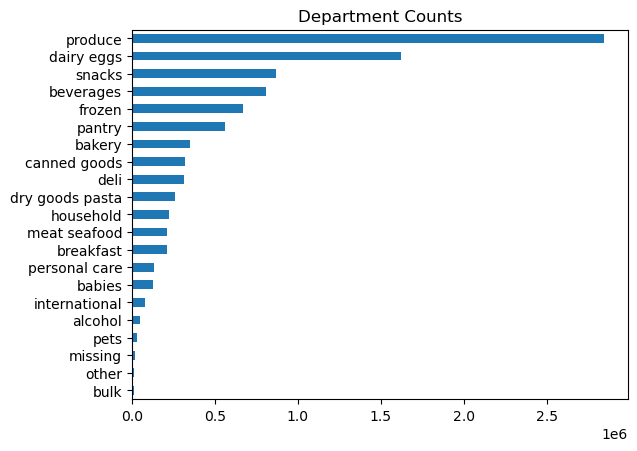

In [15]:
# Create a bar chart from the "department" column

bar_dept = df_final_subset['department'].value_counts().sort_values(ascending=True).plot.barh( title = 'Department Counts' )

The top 5 most popular departments, from highest to lowest frequency are produce,  dairy eggs, snacks, beverages,  and frozen. The 5 least popular departments, from least to greatest, are bulk, other, pets, alcohol and international.

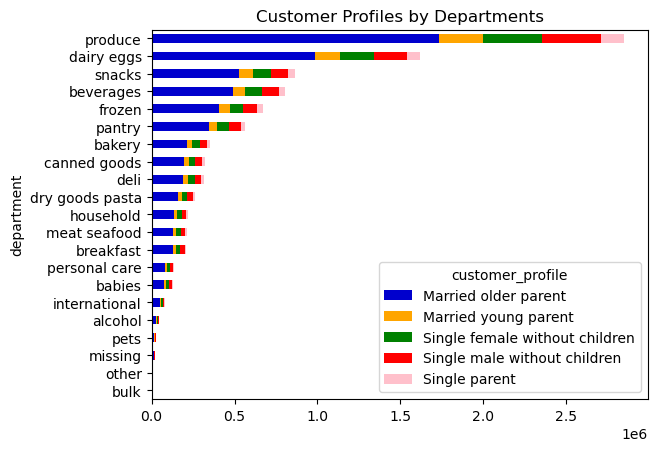

In [16]:
# Group customer profile and departments

cust_prof_depts = df_final_subset.groupby(['department', 'customer_profile']).size().unstack()

# Sort

cust_prof_depts = cust_prof_depts.loc[cust_prof_depts.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_depts = cust_prof_depts.plot.barh(stacked = True, color = ['mediumblue', 'orange', 'green', 'red', 'pink'], title = 'Customer Profiles by Departments')

The prefence of types of products for each profile is proportionately similar to the distribution for all customers, such that there would be no notable targeting strategy on a customer profile level.

In [17]:
# Check frequency 

df_final_subset['customer_profile'].value_counts(dropna=False)

Married older parent              5920461
Single male without children      1218011
Single female without children    1209978
Married young parent               907975
Single parent                      466253
Name: customer_profile, dtype: int64

In [18]:
# Create subset groups for each customer profile

married_older_parent = df_final_subset[df_final_subset['customer_profile']=='Married older parent']
single_male_without_children = df_final_subset[df_final_subset['customer_profile']=='Single male without children']
single_female_without_children = df_final_subset[df_final_subset['customer_profile']=='Single female without children']
married_young_parent = df_final_subset[df_final_subset['customer_profile']=='Married young parent']
single_parent = df_final_subset[df_final_subset['customer_profile']=='Single parent']
married_without_children = df_final_subset[df_final_subset['customer_profile']=='Married without children']

In [19]:
# Check shape of each customer profile

married_older_parent.shape

(5920461, 27)

In [20]:
single_male_without_children.shape

(1218011, 27)

In [21]:
single_female_without_children.shape

(1209978, 27)

In [22]:
married_young_parent.shape

(907975, 27)

In [23]:
single_parent.shape

(466253, 27)

In [24]:
married_without_children.shape

(0, 27)

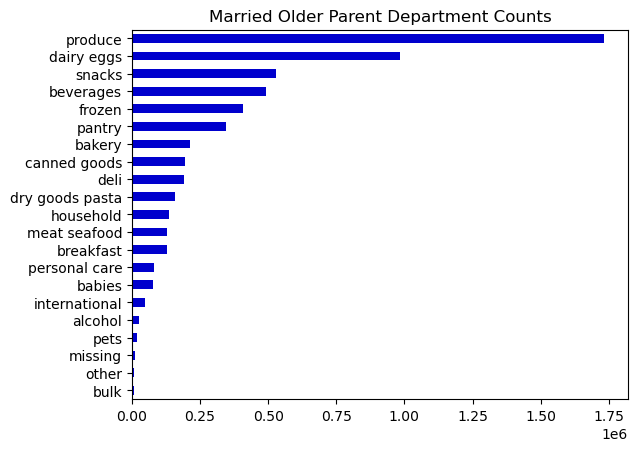

In [25]:
# Create a bar chart from the "department" column for the Married Older Parent customer profile

bar_dept_marr_old_par = married_older_parent['department'].value_counts().sort_values(ascending=True).plot.barh( color = 'mediumblue', title = 'Married Older Parent Department Counts' )

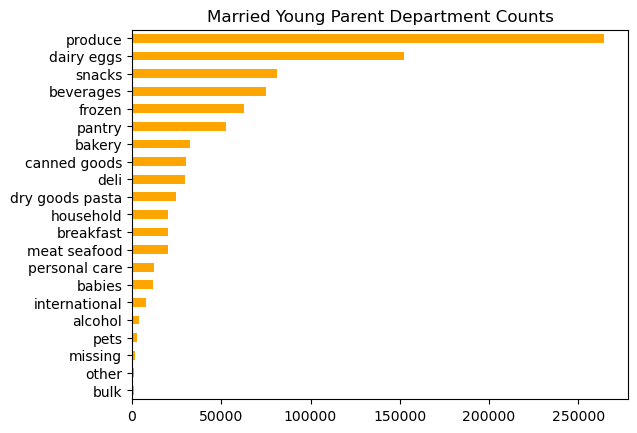

In [26]:
# Create a bar chart from the "department" column for the Married Young Parent customer profile

bar_dept_marr_yg_par = married_young_parent['department'].value_counts().sort_values(ascending=True).plot.barh( color = 'orange', title = 'Married Young Parent Department Counts' )

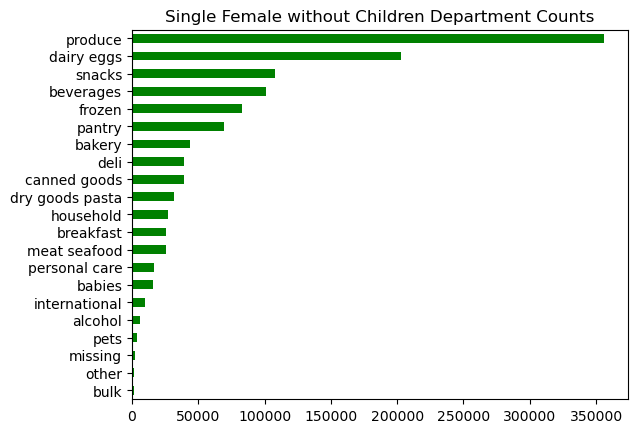

In [27]:
# Create a bar chart from the "department" column for the Single Female without Children customer profile

bar_dept_sing_fem_wo_chil = single_female_without_children['department'].value_counts().sort_values(ascending=True).plot.barh( color = 'green', title = 'Single Female without Children Department Counts' )

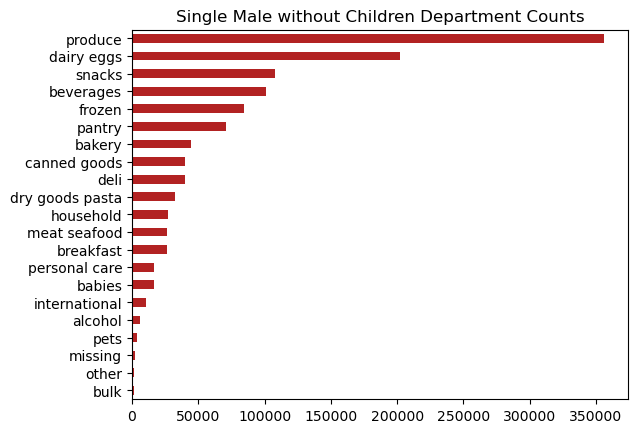

In [28]:
# Create a bar chart from the "department" column for the Single Male without Children customer profile

bar_dept_sing_mal_wo_chil = single_male_without_children['department'].value_counts().sort_values(ascending=True).plot.barh( color = 'firebrick', title = 'Single Male without Children Department Counts' )

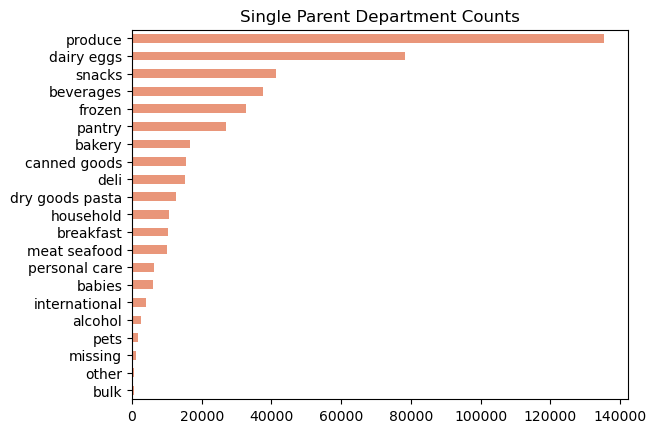

In [29]:
# Create a bar chart from the "department" column for the Single Parent customer profile

bar_dept_sing_par = single_parent['department'].value_counts().sort_values(ascending=True).plot.barh( color = 'darksalmon', title = 'Single Parent Department Counts' )

Top 5 departments proftis are produce, eggs, snacks, beverages, frozen

### 5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

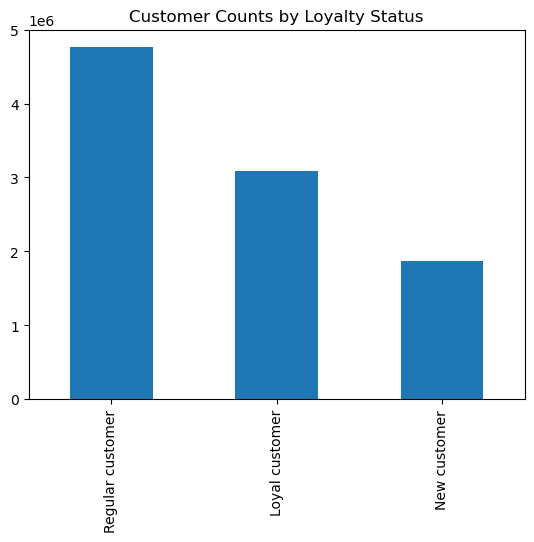

In [30]:
# Create a bar chart from the "loyalty_flag" column

bar_loyalty = df_final_subset['loyalty_flag'].value_counts().plot.bar(title = 'Customer Counts by Loyalty Status' )

Most users are regular customers then loyal customers. New customers the smallest group.

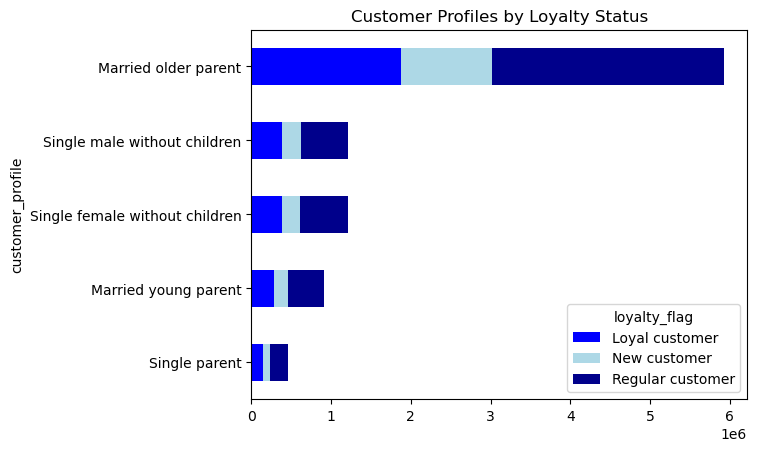

In [31]:
# Group customer profile and loyalty flag

cust_prof_loyalty = df_final_subset.groupby(['customer_profile', 'loyalty_flag']).size().unstack()

# Sort

cust_prof_loyalty = cust_prof_loyalty.loc[cust_prof_loyalty.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_loyalty = cust_prof_loyalty.plot.barh(stacked = True, title = 'Customer Profiles by Loyalty Status', color = ['blue','lightblue','darkblue'])

Each customer profile follows the same distribution pattern as the total, with regular customers having the highest frequency of orders and new customers having the least frequency of orders.

## 6. Are there difference in ordering habits?

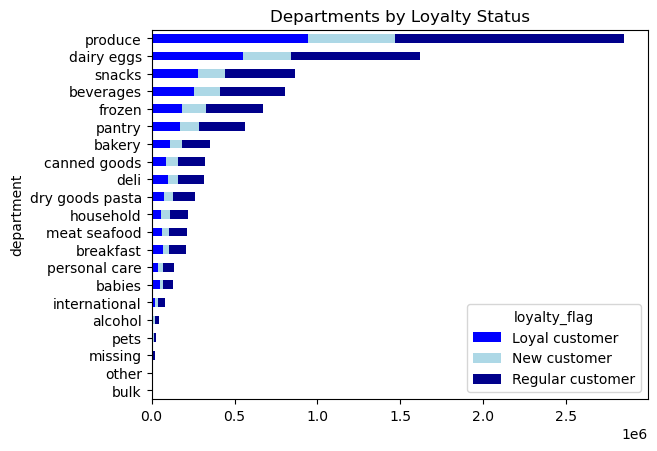

In [32]:
# Group departments and loyalty flag

dep_loyalty = df_final_subset.groupby(['department', 'loyalty_flag']).size().unstack()

# Sort

dep_loyalty = dep_loyalty.loc[dep_loyalty.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_dep_loyalty = dep_loyalty.plot.barh(stacked = True, title = 'Departments by Loyalty Status', color = ['blue','lightblue','darkblue'])

Each customer loyalty status follows the same distribution pattern of departments on a whole, with the top 5 departments being produce, dairy eggs, snacks, beverages and frozen.  

Each department also follows the same distribution pattern as the total, with regular customers having the highest amount of orders and new customers having the least amount of orders.

## 7. Are there regions difference in ordering habits?

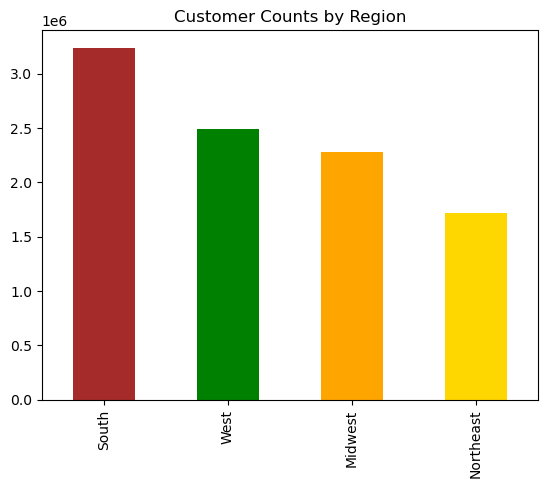

In [33]:
# Create a bar chart from the "region" column

bar_region = df_final_subset['region'].value_counts().plot.bar(title = 'Customer Counts by Region', color = ['brown', 'green', 'orange', 'gold'])

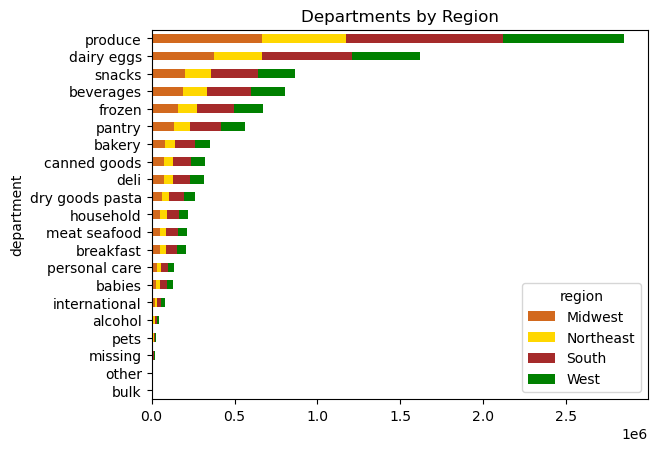

In [34]:
# Group customer department and regions

dep_region = df_final_subset.groupby(['department', 'region']).size().unstack()

# Sort

dep_region = dep_region.loc[dep_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_dep_region = dep_region.plot.barh(stacked = True, title = 'Departments by Region', color = ['chocolate','gold','brown', 'green'])

The southern region has the highest frequency of orders. followed by West. Where as the NOrth east has the least. 

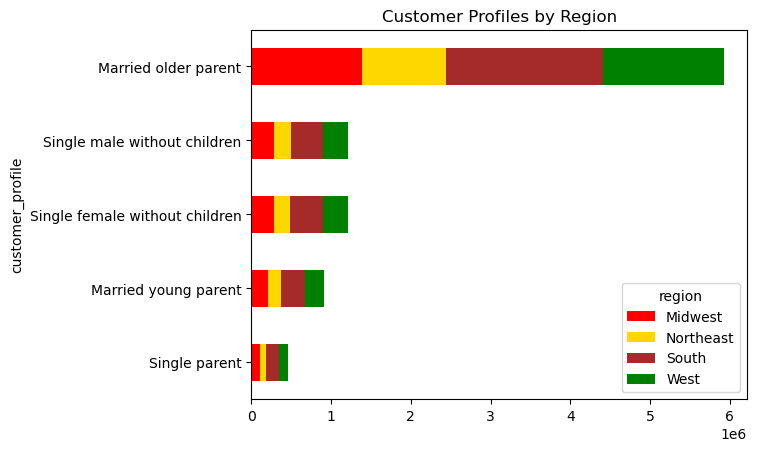

In [35]:
# Group customer profile and regions

cust_prof_region = df_final_subset.groupby(['customer_profile', 'region']).size().unstack()

# Sort

cust_prof_region = cust_prof_region.loc[cust_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_region = cust_prof_region.plot.barh(stacked = True, title = 'Customer Profiles by Region', color = ['red','gold','brown', 'green'])

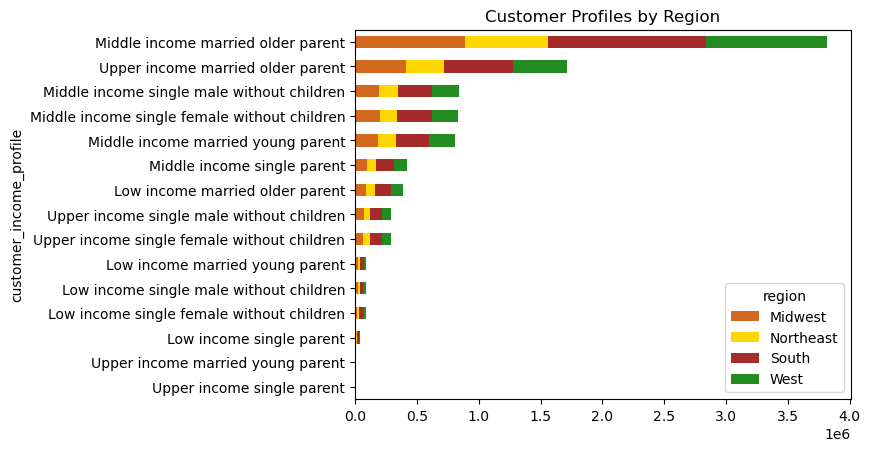

In [36]:
# Group customer income profile and regions

cust_inc_prof_region = df_final_subset.groupby(['customer_income_profile', 'region']).size().unstack()

# Sort

cust_inc_prof_region = cust_inc_prof_region.loc[cust_inc_prof_region.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_inc_prof_region = cust_inc_prof_region.plot.barh(stacked = True, title = 'Customer Profiles by Region', color = ['chocolate','gold','brown', 'forestgreen'])

The distribution is the same at the department and customer profile level, where the South region has the highest amount of orders, followed by the West and Midwest regions; and the Northeast region has the lowest frequency of customer orders.

## 8 are there connections between age and family statues in terms of ordering habits?

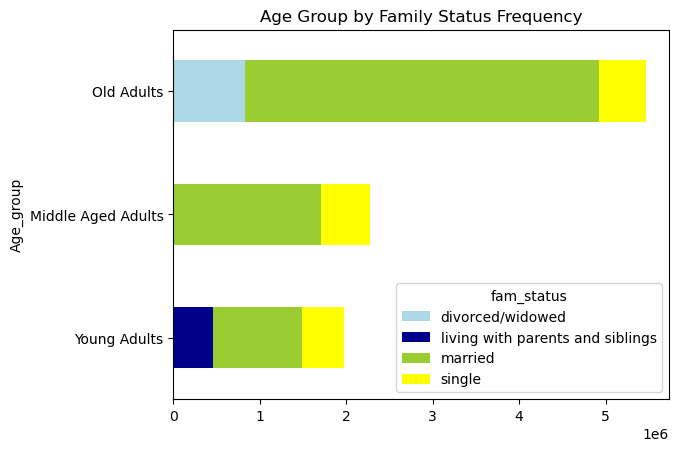

In [37]:
# Group age and family status

age_grp_fam_stat = df_final_subset.groupby(['Age_group', 'fam_status']).size().unstack()

# Sort

age_grp_fam_stat = age_grp_fam_stat.loc[age_grp_fam_stat.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_age_grp_fam_stat = age_grp_fam_stat.plot.barh(stacked = True, color = ['lightblue','darkblue', 'yellowgreen', 'yellow'], title = 'Age Group by Family Status Frequency')

Married customers have the highest frequency in orders

## 9. What different classifications does the demographic info suggest?

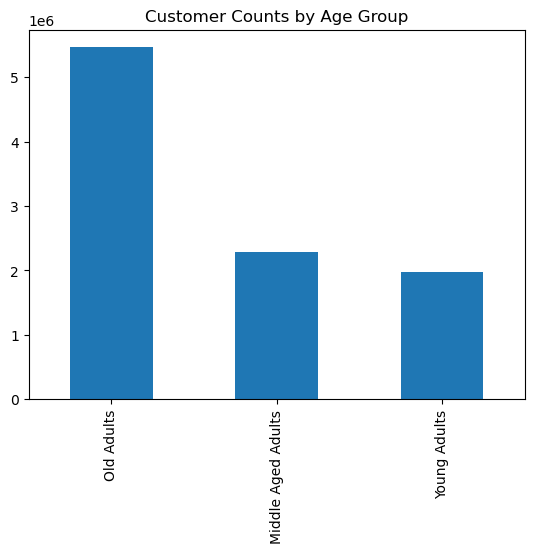

In [38]:
# Create a bar chart from the "age_group" column

bar_age_group = df_final_subset['Age_group'].value_counts().plot.bar(title = 'Customer Counts by Age Group' )

In [39]:
# Aggregate age group by orders

df_final_subset.groupby('Age_group').agg({'order_number':['min', 'mean', 'max']})

order_number               
                            min       mean max
Age_group                                     
Middle Aged Adults            1  17.242270  99
Old Adults                    1  17.137014  99
Young Adults                  1  17.039903  99

In [40]:
# Aggregate customer age group by prices

df_final_subset.groupby('Age_group').agg({'prices':['min', 'mean', 'max']})

prices                
                      min      mean   max
Age_group                                
Middle Aged Adults   0.99  7.795267  25.0
Old Adults           0.99  7.791597  25.0
Young Adults         0.99  7.783926  25.0

older adults have the higher frequency of use where as young adults have the lowest.

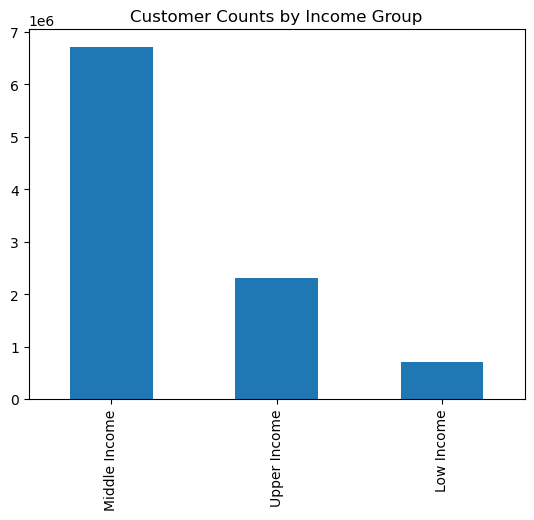

In [41]:
# Create a bar chart from the "income_group" column

bar_income_group = df_final_subset['income_group'].value_counts().plot.bar(title = 'Customer Counts by Income Group' )

In [42]:
# Aggregate income group by orders

df_final_subset.groupby('income_group').agg({'order_number':['min', 'mean', 'max']})

order_number               
                       min       mean max
income_group                             
Low Income               1  15.796342  99
Middle Income            1  17.217049  99
Upper Income             1  17.329324  99

In [43]:
# Aggregate customer income group by prices

df_final_subset.groupby('income_group').agg({'prices':['min', 'mean', 'max']})

prices                
                 min      mean   max
income_group                        
Low Income      1.00  6.560361  25.0
Middle Income   0.99  7.863451  25.0
Upper Income    0.99  7.951116  25.0

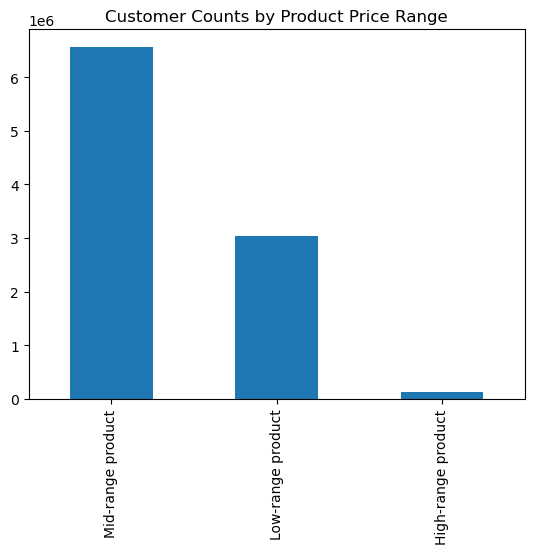

In [44]:
# Create a bar chart from the "price_range" column

bar_price_range = df_final_subset['price_range'].value_counts().plot.bar(title = 'Customer Counts by Product Price Range' )

In [45]:
# Aggregate product price ranges by orders

df_final_subset.groupby('price_range').agg({'order_number':['min', 'mean', 'max']})

order_number               
                            min       mean max
price_range                                   
High-range product            1  15.876738  99
Low-range product             1  17.107412  99
Mid-range product             1  17.181683  99

In [46]:
# Aggregate product price ranges by prices

df_final_subset.groupby('price_range').agg({'prices':['min', 'mean', 'max']})

prices                 
                      min       mean   max
price_range                               
High-range product  15.10  20.598657  25.0
Low-range product    0.99   3.022474   5.0
Mid-range product    5.10   9.758657  15.0

Mid range products have the highest order frequency.

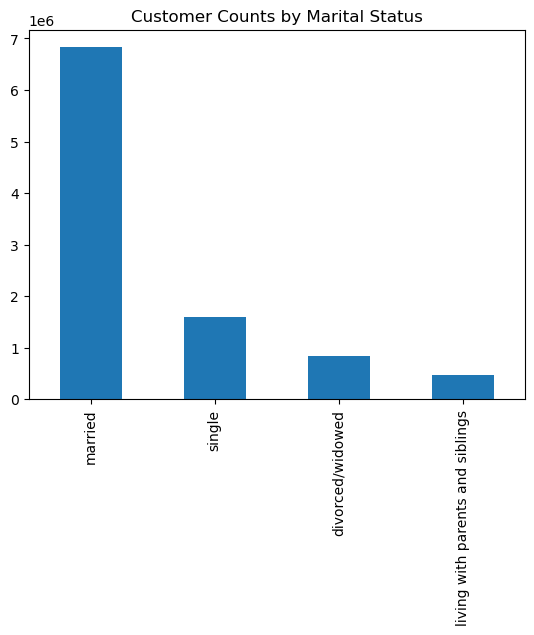

In [47]:
# Create a bar chart from the "marital_status" column

bar_marital_status = df_final_subset['fam_status'].value_counts().plot.bar(title = 'Customer Counts by Marital Status' )

In [48]:
# Aggregate product price ranges by family status

df_final_subset.groupby('fam_status').agg({'order_number':['min', 'mean', 'max']})

order_number               
                                          min       mean max
fam_status                                                  
divorced/widowed                            1  17.287856  99
living with parents and siblings            1  17.294222  99
married                                     1  17.087923  99
single                                      1  17.252378  99

In [49]:
# Aggregate product price ranges by family status

df_final_subset.groupby('fam_status').agg({'prices':['min', 'mean', 'max']})

prices                
                                    min      mean   max
fam_status                                             
divorced/widowed                   0.99  7.806050  25.0
living with parents and siblings   0.99  7.805966  25.0
married                            0.99  7.790348  25.0
single                             0.99  7.780938  25.0

The married customers have the highest frequency of orders, by a significant difference to the next highest group, the singles.  The living with parents and siblings group has the least amount of orders.

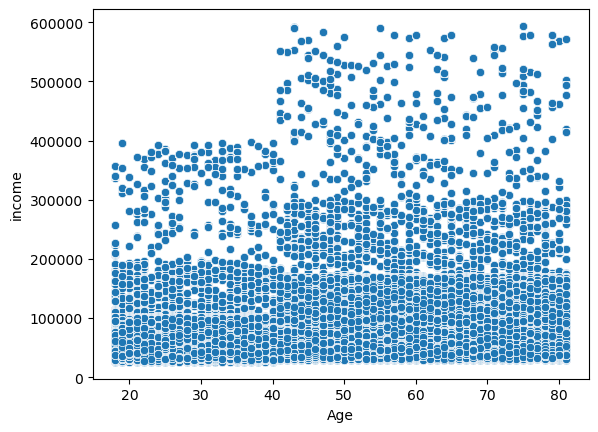

In [50]:
# Create a scatterplot of the "age" and "income" columns

scatt_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_final_subset)

The scatterplot shows notable increase in spedning power over age of 40

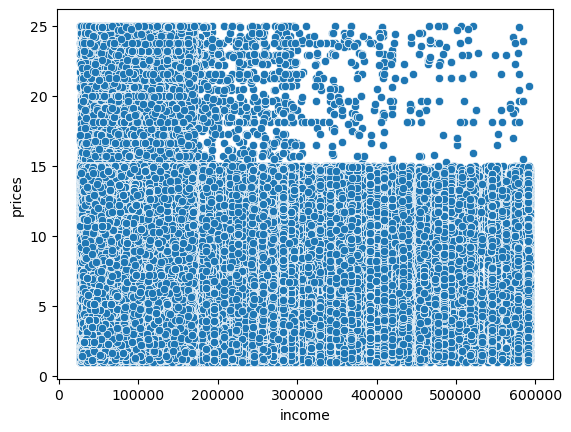

In [51]:
# Create a scatterplot of the "price" and "income" columns

scatt_price_income = sns.scatterplot(x = 'income', y = 'prices', data = df_final_subset)

### 10. What differences can you find in ordering habits of different customer profiles?  Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

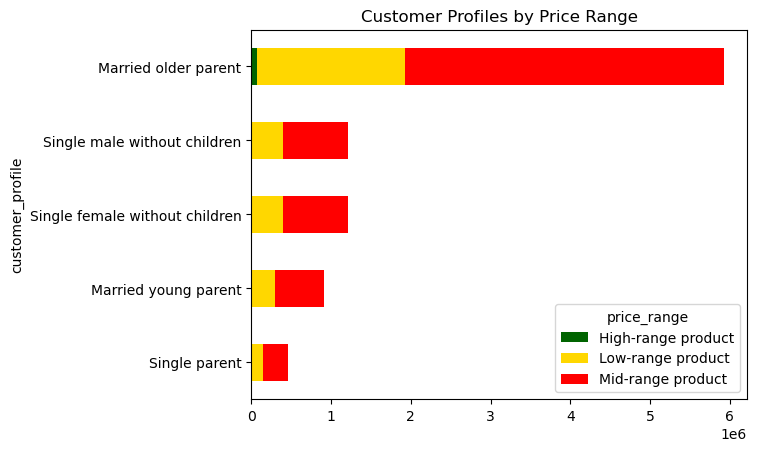

In [52]:
# Group customer profile and price range - SEE QUESTION #3

cust_prof_price_range = df_final_subset.groupby(['customer_profile', 'price_range']).size().unstack()

# Sort

cust_prof_price_range = cust_prof_price_range.loc[cust_prof_price_range.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

cust_prof_price_range_bar = cust_prof_price_range.plot.barh(stacked = True, title = 'Customer Profiles by Price Range', color = ['darkgreen', 'gold', 'red'])


Customer profiles show the mid range orders with the highest frequency followed by low range products.

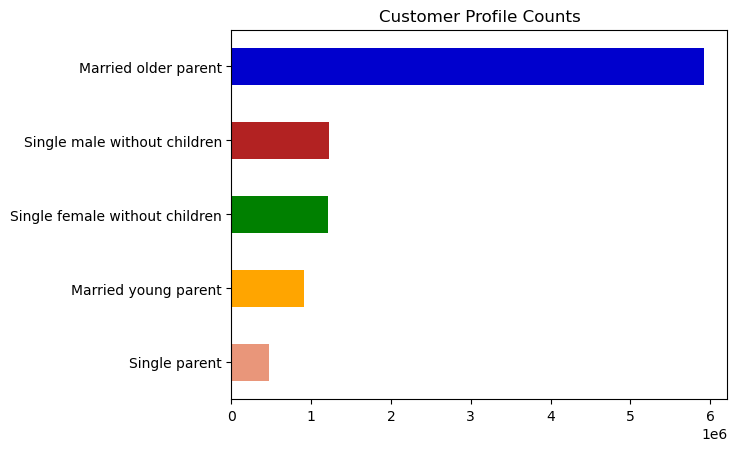

In [53]:
# Create a bar chart from the "customer_profile" column

bar_cust_prof = df_final_subset['customer_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['darksalmon', 'orange', 'green', 'firebrick', 'mediumblue'], title = 'Customer Profile Counts' )

Orders for the married older parent profile greatly exceed the other profiles by more than 3 times.  It's followed by the single male and female groups.  The single parent customer profile has the least amount of orders.

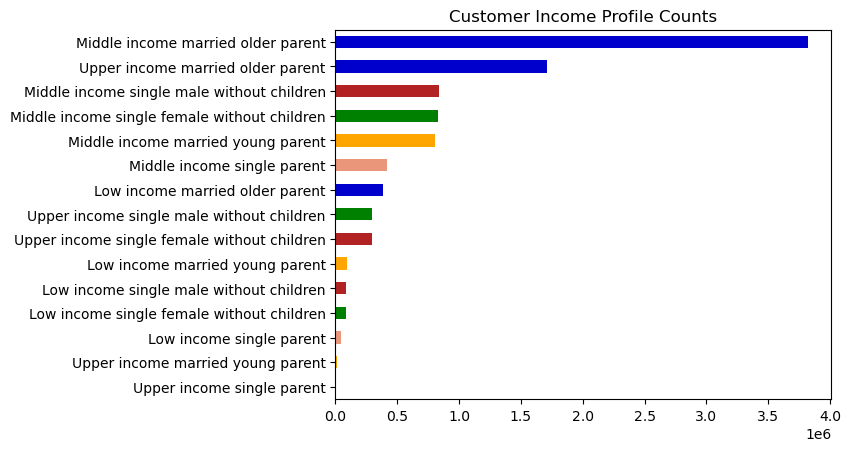

In [54]:
# Create bar chart
bar_cust_inc_prof = df_final_subset['customer_income_profile'].value_counts().sort_values(ascending=True).plot.barh(color = ['darksalmon','orange','darksalmon', 'green','firebrick', 'orange', 'firebrick', 'green', 'mediumblue', 'darksalmon','orange','green','firebrick','mediumblue', 'mediumblue'], title = 'Customer Income Profile Counts' )

The middle income married older parent profile far exceeds the other customer income profile groups.  The next group that follows, the upper income married older parent group, is a little less than half the order frequency.  The customer income profile group with the least orders is the Upper income single parent profile.

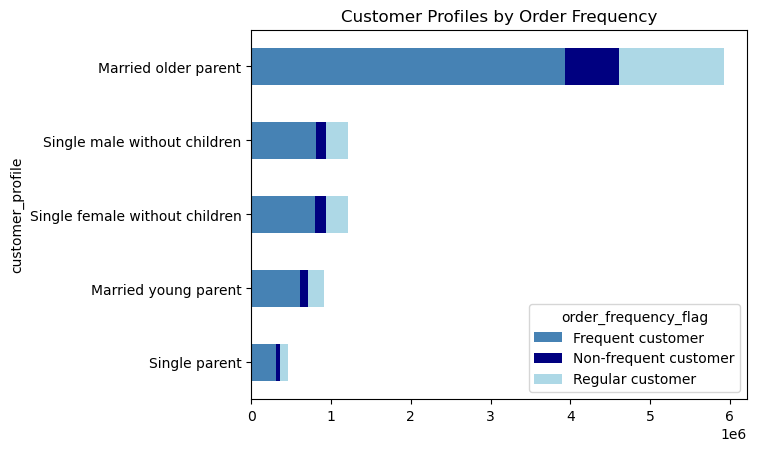

In [55]:
# Group customer profile and loyalty flag

cust_prof_order_frequency = df_final_subset.groupby(['customer_profile', 'order_frequency_flag']).size().unstack()

# Sort

cust_prof_order_frequency = cust_prof_order_frequency.loc[cust_prof_order_frequency.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_order_frequency = cust_prof_order_frequency.plot.barh(stacked = True, title = 'Customer Profiles by Order Frequency', color = ['steelblue', 'navy', 'lightblue'])

Across all the customer profiles, the majority of customers fall into the frequent customer group.  A very small population of each profile falls into the non-frequent customer group.

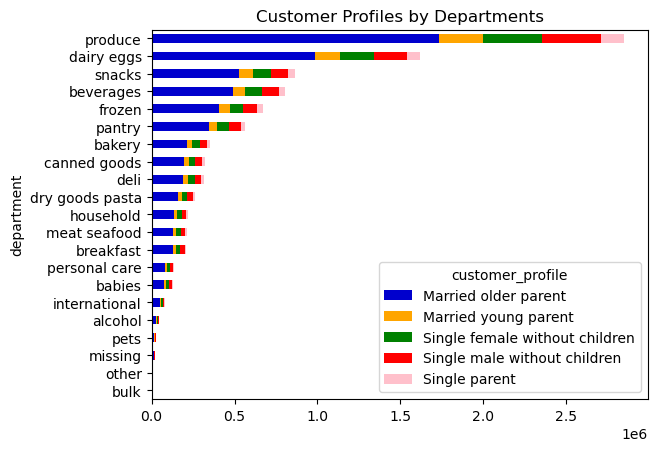

In [56]:
# Group customer profile and departments - SEE QUESTION #4

cust_prof_depts = df_final_subset.groupby(['department', 'customer_profile']).size().unstack()

# Sort

cust_prof_depts = cust_prof_depts.loc[cust_prof_depts.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_depts = cust_prof_depts.plot.barh(stacked = True, color = ['mediumblue', 'orange', 'green', 'red', 'pink'], title = 'Customer Profiles by Departments')

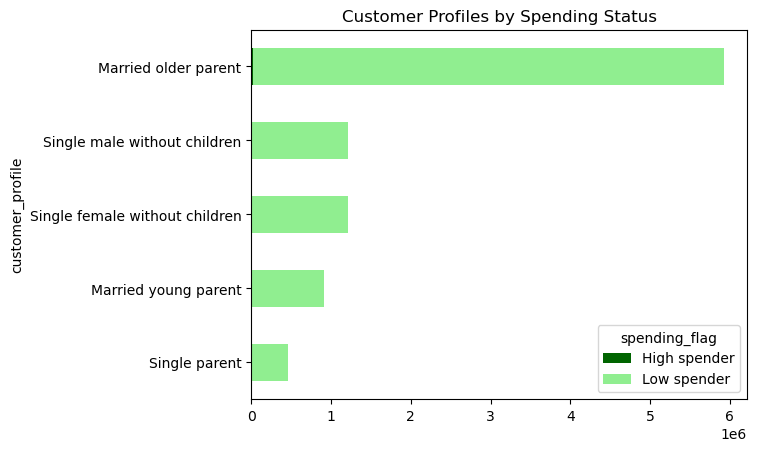

In [57]:
# Group customer profile and spending flag

cust_prof_spending = df_final_subset.groupby(['customer_profile', 'spending_flag']).size().unstack()

# Sort

cust_prof_spending = cust_prof_spending.loc[cust_prof_spending.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart

bar_cust_prof_spending = cust_prof_spending.plot.barh(stacked = True, color = ['darkgreen', 'lightgreen'], title = 'Customer Profiles by Spending Status')

In [58]:
# Export question 1 visualizations

hist_day_of_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '1 Histogram day of week'))
hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '1 Histogram hour of day'))
bar_cust_prof_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '1 Bar customer profiles by day group'))
bar_cust_prof_time_period.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '1 Bar customer profiles by time group'))

In [59]:
# Export question 2 visualization

line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '2 Line prices by hour'))

In [60]:
# Export question 3 visualizations

hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '3 Histogram prices'))
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '3 Bar price range'))
bar_cust_prof_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '3 Bar customer profiles by price range'))
bar_cust_inc_prof_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '3 Bar customer income profiles by price range'))

In [61]:
# Export question 4 visualizations

bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 Bar departments'))
bar_cust_prof_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 Bar customer profiles by departments'))
bar_dept_marr_old_par.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 Bar married older parents by departments'))
bar_dept_sing_mal_wo_chil.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 Bar single male without children by departments'))
bar_dept_sing_fem_wo_chil.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 Bar single female without children by departments'))
bar_dept_marr_yg_par.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 Bar married young parents by departments'))
bar_dept_sing_par.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '4 Bar single parent by departments'))

In [62]:
# Export question 5 visualizations

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '5 Bar customer loyalty status'))
bar_cust_prof_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '5 Bar customer profiles by loyalty status'))

In [63]:
# Export question 6 visualization

bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '6 Bar departments by loyalty status'))

In [64]:
# Export question 7 visualizations

bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '7 Bar regions'))
bar_dep_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '7 Bar departmens by regions'))
bar_cust_prof_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '7 Bar customer profiles by regions'))
bar_cust_inc_prof_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '7 Bar customer income profiles by regions'))

In [65]:
# Export question 8 visualization

bar_age_grp_fam_stat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '8 Bar age group by family status'))

In [66]:
# Export question 9 visualizations

bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 Bar age group'))
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 Bar income group'))
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 Bar price range'))
bar_marital_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 Bar marital status'))
scatt_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 Scatterplot age by income'))
scatt_price_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '9 Scatterplot income by prices'))

In [67]:
# Export question 10 visualizations

bar_cust_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '10 Bar customer profiles'))
bar_cust_inc_prof.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '10 Bar customer income profiles'))
bar_cust_prof_order_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '10 Bar customer profiles by order frequency'))
bar_cust_prof_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', '10 Bar customer profiles by spending'))